In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('Data_Extract_From_Worldwide_Governance_Indicators.xlsx')

In [3]:
data.head()

,Country Name,Country Code,Series Name,2005,2010,2015,2018
0,Afghanistan,AFG,Control of Corruption,-1.44361,-1.63572,-1.34199,-1.49665
1,Afghanistan,AFG,Government Effectiveness,-1.21083,-1.45468,-1.32297,-1.45728
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,-2.07093,-2.57915,-2.57122,-2.74673
3,Afghanistan,AFG,Regulatory Quality,-1.63737,-1.53286,-0.997371,-1.13263
4,Afghanistan,AFG,Rule of Law,-1.65867,-1.84544,-1.50404,-1.66848


In [4]:
data = pd.melt(data, id_vars=['Country Name','Country Code','Series Name'], var_name = 'Année', value_name = 'Note')
data.head()

,Country Name,Country Code,Series Name,Année,Note
0,Afghanistan,AFG,Control of Corruption,2005,-1.44361
1,Afghanistan,AFG,Government Effectiveness,2005,-1.21083
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,2005,-2.07093
3,Afghanistan,AFG,Regulatory Quality,2005,-1.63737
4,Afghanistan,AFG,Rule of Law,2005,-1.65867


In [5]:
#data.pivot(index = [('Country Name','Country Code','Année')], columns = 'Series Name', values = 'Note')
data['Series Name'].unique()

array(['Control of Corruption', 'Government Effectiveness',
       'Political Stability and Absence of Violence/Terrorism',
       'Regulatory Quality', 'Rule of Law', 'Voice and Accountability'],
      dtype=object)

In [6]:
data = pd.crosstab([data['Country Name'],data['Country Code'],data['Année']],data['Series Name'], values=data.Note, aggfunc = sum)
data.reset_index(inplace = True)
data.head()

Series Name,Country Name,Country Code,Année,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
0,Afghanistan,AFG,2005,-1.44361,-1.21083,-2.07093,-1.63737,-1.65867,-1.12543
1,Afghanistan,AFG,2010,-1.63572,-1.45468,-2.57915,-1.53286,-1.84544,-1.40447
2,Afghanistan,AFG,2015,-1.34199,-1.32297,-2.57122,-0.997371,-1.50404,-1.11756
3,Afghanistan,AFG,2018,-1.49665,-1.45728,-2.74673,-1.13263,-1.66848,-0.99472
4,Afrique du Sud,ZAF,2005,0.568106,0.642373,-0.162605,0.703134,0.114751,0.64901


In [7]:
data.to_csv('notes_OMC.csv', sep = ';')

In [8]:
data.loc[data.Année == 2018,'Année'] = 2019

In [9]:
google = pd.read_csv('base_prox_doubles.csv')

In [10]:
google.head()

,Unnamed: 0,Pays,Annee,Type_contenu,Prox_moyenne,Prox_top3
0,0,Afghanistan,2005,tourisme,-0.498674,0.972649
1,1,Afghanistan,2010,tourisme,-0.632610,-0.123168
2,2,Afghanistan,2015,tourisme,-0.647653,-0.279275
3,3,Afghanistan,2019,tourisme,-0.610168,0.270360
4,4,Afrique du Sud,2005,tourisme,0.228614,2.379262


In [11]:
google.drop(["Unnamed: 0"], inplace = True, axis = 1)

In [12]:
google.dtypes

Pays             object
Annee             int64
Type_contenu     object
Prox_moyenne    float64
Prox_top3       float64
dtype: object

In [13]:
data.dtypes

Series Name
Country Name                                             object
Country Code                                             object
Année                                                     int64
Control of Corruption                                    object
Government Effectiveness                                 object
Political Stability and Absence of Violence/Terrorism    object
Regulatory Quality                                       object
Rule of Law                                              object
Voice and Accountability                                 object
dtype: object

In [14]:
pays = pd.read_excel('pays_libs_codes.xlsx')

In [15]:
pays.head()

,Pays,Code2,Code3,Country,Continent,Sous-continent
0,Afrique du Sud,ZA,ZAF,South Africa,Africa,Southern Africa
1,Afghanistan,AF,AFG,Afghanistan,Asia,Southern Asia
2,Albanie,AL,ALB,Albania,Europe,Southern Europe
3,Algérie,DZ,DZA,Algeria,Africa,Northern Africa
4,Allemagne,DE,DEU,Germany,Europe,Western Europe


In [16]:
google = google.merge(pays,left_on=google.Pays, right_on='Pays', how = "left")

In [17]:
google[google.Code3.isna()]

,Pays,Pays_x,Annee,Type_contenu,Prox_moyenne,Prox_top3,Pays_y,Code2,Code3,Country,Continent,Sous-continent
280,Ile Maurice,Ile Maurice,2005,tourisme,0.872924,2.212737,NaN,NaN,NaN,NaN,NaN,NaN
281,Ile Maurice,Ile Maurice,2010,tourisme,1.105273,2.623353,NaN,NaN,NaN,NaN,NaN,NaN
282,Ile Maurice,Ile Maurice,2015,tourisme,1.466330,2.665633,NaN,NaN,NaN,NaN,NaN,NaN
283,Ile Maurice,Ile Maurice,2019,tourisme,0.552211,2.162620,NaN,NaN,NaN,NaN,NaN,NaN
1068,Ile Maurice,Ile Maurice,2005,reservations,-0.006126,0.037881,NaN,NaN,NaN,NaN,NaN,NaN
1069,Ile Maurice,Ile Maurice,2010,reservations,0.011422,0.180245,NaN,NaN,NaN,NaN,NaN,NaN
1070,Ile Maurice,Ile Maurice,2015,reservations,0.030168,0.362253,NaN,NaN,NaN,NaN,NaN,NaN
1071,Ile Maurice,Ile Maurice,2019,reservations,-0.012603,0.034049,NaN,NaN,NaN,NaN,NaN,NaN
1856,Ile Maurice,Ile Maurice,2005,guides,0.047405,0.591601,NaN,NaN,NaN,NaN,NaN,NaN
1857,Ile Maurice,Ile Maurice,2010,guides,0.017808,0.371618,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
google.loc[google.Code3.isna(),'Code3'] = 'MUS'

In [19]:
google.loc[google.Pays == 'Ile Maurice'].head()

,Pays,Pays_x,Annee,Type_contenu,Prox_moyenne,Prox_top3,Pays_y,Code2,Code3,Country,Continent,Sous-continent
280,Ile Maurice,Ile Maurice,2005,tourisme,0.872924,2.212737,NaN,NaN,MUS,NaN,NaN,NaN
281,Ile Maurice,Ile Maurice,2010,tourisme,1.105273,2.623353,NaN,NaN,MUS,NaN,NaN,NaN
282,Ile Maurice,Ile Maurice,2015,tourisme,1.466330,2.665633,NaN,NaN,MUS,NaN,NaN,NaN
283,Ile Maurice,Ile Maurice,2019,tourisme,0.552211,2.162620,NaN,NaN,MUS,NaN,NaN,NaN
1068,Ile Maurice,Ile Maurice,2005,reservations,-0.006126,0.037881,NaN,NaN,MUS,NaN,NaN,NaN


In [20]:
googleOMC = google.merge(data, left_on=[google.Code3,google.Annee], right_on= ['Country Code',"Année"], how = "left")

In [21]:
googleOMC.dtypes

Pays                                                      object
Pays_x                                                    object
Annee                                                      int64
Type_contenu                                              object
Prox_moyenne                                             float64
Prox_top3                                                float64
Pays_y                                                    object
Code2                                                     object
Code3                                                     object
Country                                                   object
Continent                                                 object
Sous-continent                                            object
Country Name                                              object
Country Code                                              object
Année                                                      int64
Control of Corruption    

In [22]:
googleOMC.drop(['Country','Country Name','Country Code','Année','Pays_x','Pays_y'], axis = 1, inplace=True)

In [23]:
 googleOMC.head()

,Pays,Annee,Type_contenu,Prox_moyenne,Prox_top3,Code2,Code3,Continent,Sous-continent,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
0,Afghanistan,2005,tourisme,-0.498674,0.972649,AF,AFG,Asia,Southern Asia,-1.44361,-1.21083,-2.07093,-1.63737,-1.65867,-1.12543
1,Afghanistan,2010,tourisme,-0.632610,-0.123168,AF,AFG,Asia,Southern Asia,-1.63572,-1.45468,-2.57915,-1.53286,-1.84544,-1.40447
2,Afghanistan,2015,tourisme,-0.647653,-0.279275,AF,AFG,Asia,Southern Asia,-1.34199,-1.32297,-2.57122,-0.997371,-1.50404,-1.11756
3,Afghanistan,2019,tourisme,-0.610168,0.270360,AF,AFG,Asia,Southern Asia,-1.49665,-1.45728,-2.74673,-1.13263,-1.66848,-0.99472
4,Afrique du Sud,2005,tourisme,0.228614,2.379262,ZA,ZAF,Africa,Southern Africa,0.568106,0.642373,-0.162605,0.703134,0.114751,0.64901


In [24]:
googleOMC.shape

(7880, 15)

In [25]:
googleOMC.to_csv('donnees_pour_tableau.csv')

In [26]:
base_corr = googleOMC

In [27]:
base_corr.drop((base_corr[base_corr['Political Stability and Absence of Violence/Terrorism'] == ".."]).index, axis = 0, inplace = True)
base_corr.drop((base_corr[base_corr['Control of Corruption'] == ".."]).index, axis = 0, inplace = True)
base_corr.drop((base_corr[base_corr['Government Effectiveness'] == ".."]).index, axis = 0, inplace = True)

In [28]:
base_corr['Control of Corruption'] = base_corr['Control of Corruption'].astype('float')
base_corr['Government Effectiveness'] = base_corr['Government Effectiveness'].astype('float')
base_corr['Political Stability and Absence of Violence/Terrorism'] = base_corr['Political Stability and Absence of Violence/Terrorism'].astype('float')
base_corr['Regulatory Quality'] = base_corr['Regulatory Quality'].astype('float')
base_corr['Rule of Law'] = base_corr['Rule of Law'].astype('float')
base_corr['Voice and Accountability'] = base_corr['Voice and Accountability'].astype('float')

In [29]:
base_corr.shape

(7690, 15)

In [30]:
googleOMC[['Continent','Sous-continent','Pays','Control of Corruption','Government Effectiveness','Political Stability and Absence of Violence/Terrorism','Regulatory Quality','Rule of Law','Voice and Accountability','Prox_moyenne']]

,Continent,Sous-continent,Pays,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability,Prox_moyenne
0,Asia,Southern Asia,Afghanistan,-1.443609,-1.210829,-2.070934,-1.637369,-1.658668,-1.125430,-0.498674
1,Asia,Southern Asia,Afghanistan,-1.635723,-1.454683,-2.579152,-1.532861,-1.845436,-1.404468,-0.632610
2,Asia,Southern Asia,Afghanistan,-1.341994,-1.322968,-2.571222,-0.997371,-1.504040,-1.117563,-0.647653
3,Asia,Southern Asia,Afghanistan,-1.496648,-1.457285,-2.746730,-1.132634,-1.668478,-0.994720,-0.610168
4,Africa,Southern Africa,Afrique du Sud,0.568106,0.642373,-0.162605,0.703134,0.114751,0.649010,0.228614
...,...,...,...,...,...,...,...,...,...,...
7873,Oceania,Polynesia,Îles Cook,-0.249485,-1.011447,1.322361,-1.236971,-0.911697,-0.357334,-0.010397
7876,Oceania,Micronesia,Îles Marshall,-0.464617,-1.039871,1.067156,-0.759715,-0.071769,1.186264,-0.015111
7877,Oceania,Micronesia,Îles Marshall,-0.334662,-1.281250,1.153066,-0.982468,-0.260285,1.112288,-0.015103
7878,Oceania,Micronesia,Îles Marshall,-0.115136,-1.601155,0.919474,-1.121721,-0.212632,1.178826,-0.009504


In [31]:
googleOMC[googleOMC['Control of Corruption'].isna()].head()

,Pays,Annee,Type_contenu,Prox_moyenne,Prox_top3,Code2,Code3,Continent,Sous-continent,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
732,Vatican,2005,tourisme,-0.511676,0.853640,VA,VAT,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN
733,Vatican,2010,tourisme,-0.427459,1.483959,VA,VAT,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN
734,Vatican,2015,tourisme,-0.308332,1.370139,VA,VAT,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN
735,Vatican,2019,tourisme,-0.504446,0.794264,VA,VAT,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN
1520,Vatican,2005,reservations,-0.005056,0.085152,VA,VAT,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
googleOMC.drop(list(googleOMC[googleOMC['Control of Corruption'].isna()].index), inplace = True, axis = 0)

In [33]:
googleOMC.drop(list(googleOMC[googleOMC['Annee'] == 2019].index), inplace = True, axis = 0)

In [34]:
googleOMC_ssdate = base_corr.drop('Annee', inplace = False, axis = 1)

In [47]:
googleOMC_ssdate.Prox_moyenne = [-x for x in googleOMC_ssdate.Prox_moyenne]
googleOMC_ssdate.Prox_top3 = [-x for x in googleOMC_ssdate.Prox_top3]

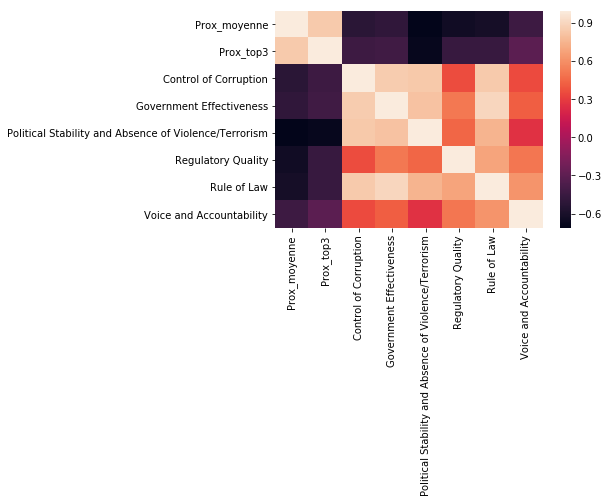

In [53]:
import seaborn as sns
sns.heatmap(googleOMC_ssdate[(googleOMC_ssdate.Type_contenu == "politique")&(googleOMC_ssdate['Sous-continent'] == "Southern Asia")].corr())

In [107]:
googleOMC_ssdate[googleOMC_ssdate.Type_contenu == "actu"].corr()

,Prox_moyenne,Prox_top3,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
Prox_moyenne,1.000000,0.765106,0.185827,0.193048,0.322410,0.175807,0.180099,0.227381
Prox_top3,0.765106,1.000000,0.166919,0.197032,0.276724,0.183910,0.179429,0.209239
Control of Corruption,0.185827,0.166919,1.000000,0.921910,0.734718,0.867987,0.944112,0.778583
Government Effectiveness,0.193048,0.197032,0.921910,1.000000,0.678563,0.935118,0.938685,0.741885
Political Stability and Absence of Violence/Terrorism,0.322410,0.276724,0.734718,0.678563,1.000000,0.621055,0.754328,0.668193
Regulatory Quality,0.175807,0.183910,0.867987,0.935118,0.621055,1.000000,0.911583,0.771257
Rule of Law,0.180099,0.179429,0.944112,0.938685,0.754328,0.911583,1.000000,0.808778
Voice and Accountability,0.227381,0.209239,0.778583,0.741885,0.668193,0.771257,0.808778,1.000000


In [90]:
googleOMC_ssdate[(googleOMC_ssdate.Type_contenu == "politique")&(googleOMC_ssdate['Continent'] == "Africa")].corr()

,Prox_moyenne,Prox_top3,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
Prox_moyenne,1.000000,0.770000,-0.561293,-0.535576,-0.652167,-0.491660,-0.582284,-0.495404
Prox_top3,0.770000,1.000000,-0.511118,-0.445035,-0.542577,-0.398505,-0.503580,-0.420114
Control of Corruption,-0.561293,-0.511118,1.000000,0.868164,0.690171,0.779309,0.892936,0.708703
Government Effectiveness,-0.535576,-0.445035,0.868164,1.000000,0.649598,0.871754,0.916370,0.671245
Political Stability and Absence of Violence/Terrorism,-0.652167,-0.542577,0.690171,0.649598,1.000000,0.608160,0.729053,0.584576
Regulatory Quality,-0.491660,-0.398505,0.779309,0.871754,0.608160,1.000000,0.882033,0.727891
Rule of Law,-0.582284,-0.503580,0.892936,0.916370,0.729053,0.882033,1.000000,0.740935
Voice and Accountability,-0.495404,-0.420114,0.708703,0.671245,0.584576,0.727891,0.740935,1.000000


In [101]:
googleOMC_ssdate[(googleOMC_ssdate.Type_contenu == "politique")&(googleOMC_ssdate['Sous-continent'] == "Western Africa")].corr()

,Prox_moyenne,Prox_top3,Control of Corruption,Government Effectiveness,Political Stability and Absence of Violence/Terrorism,Regulatory Quality,Rule of Law,Voice and Accountability
Prox_moyenne,1.000000,0.841611,-0.471150,-0.329430,-0.651466,-0.261645,-0.471105,-0.336964
Prox_top3,0.841611,1.000000,-0.566701,-0.399106,-0.523610,-0.316090,-0.514755,-0.467119
Control of Corruption,-0.471150,-0.566701,1.000000,0.855605,0.629185,0.776718,0.920957,0.766174
Government Effectiveness,-0.329430,-0.399106,0.855605,1.000000,0.550453,0.870933,0.880920,0.685439
Political Stability and Absence of Violence/Terrorism,-0.651466,-0.523610,0.629185,0.550453,1.000000,0.481135,0.677627,0.568986
Regulatory Quality,-0.261645,-0.316090,0.776718,0.870933,0.481135,1.000000,0.834889,0.602787
Rule of Law,-0.471105,-0.514755,0.920957,0.880920,0.677627,0.834889,1.000000,0.772158
Voice and Accountability,-0.336964,-0.467119,0.766174,0.685439,0.568986,0.602787,0.772158,1.000000
